In [53]:
import time
import sys
sys.path.append('../')
from pinn_magnetic_experimental import MultiDipoleModel
import smtf_utility as util

In [54]:
def percentage(input, predicted):
    adiff = abs(input-predicted)
    delta = 0
    if input > adiff:
        delta = input - adiff
    else:
        delta = adiff + input
    
    return ((delta/input) * 100)

In [55]:
sim = util.bf_simulator(distances=[1, 1.33, 1.66, 1.99], delta=30, scale=1e9)

xpole = 0.1
ypole = 0.2
zpole = -0.6

sim.add_dipole(0.0, 0, 0, xpole, 0, 0)
sim.add_dipole(0.0, 0, 0, 0, ypole, 0)
sim.add_dipole(0.0, 0, 0, 0, 0, zpole)

In [56]:
positions, values = sim.get_data()
positions, values = util.shuffle_data(positions, values)

In [57]:
model = MultiDipoleModel(poles=1, lrate=0.06, optimizer='adadelta', loss='mse', scale=1e9, early_stop=False, target_stop=.000000002)
test_epochs = 500

In [58]:
start = time.time()
model.fit(positions, values, epochs=test_epochs)
end = time.time()

epoch  0 --- Loss --- 558.587
epoch  1 --- Loss --- 554.05304
epoch  2 --- Loss --- 549.85754
epoch  3 --- Loss --- 545.8627
epoch  4 --- Loss --- 542.0026
epoch  5 --- Loss --- 538.23553
epoch  6 --- Loss --- 534.53455
epoch  7 --- Loss --- 530.88214
epoch  8 --- Loss --- 527.26715
epoch  9 --- Loss --- 523.68207
epoch  10 --- Loss --- 520.12195
epoch  11 --- Loss --- 516.5835
epoch  12 --- Loss --- 513.06445
epoch  13 --- Loss --- 509.5633
epoch  14 --- Loss --- 506.07877
epoch  15 --- Loss --- 502.6102
epoch  16 --- Loss --- 499.157
epoch  17 --- Loss --- 495.7188
epoch  18 --- Loss --- 492.29526
epoch  19 --- Loss --- 488.88617
epoch  20 --- Loss --- 485.49146
epoch  21 --- Loss --- 482.1109
epoch  22 --- Loss --- 478.74448
epoch  23 --- Loss --- 475.39212
epoch  24 --- Loss --- 472.05383
epoch  25 --- Loss --- 468.72952
epoch  26 --- Loss --- 465.41916
epoch  27 --- Loss --- 462.12274
epoch  28 --- Loss --- 458.84027
epoch  29 --- Loss --- 455.57175
epoch  30 --- Loss --- 452.3171

In [59]:
ellapsed_minutes = ((end - start) / 60)
print("Total training time: " + str(ellapsed_minutes) + " minutes")

Total training time: 4.930849250157674 minutes


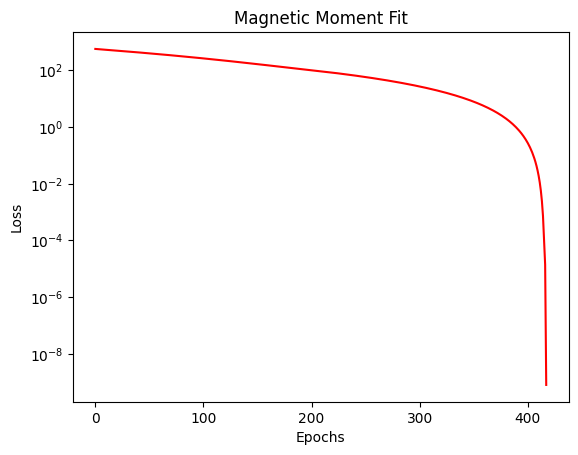

In [60]:
import matplotlib.pyplot as plt

y_axis = model.loss_history
x_axis = [*range(0, len(y_axis), 1)]

plt.plot(x_axis, y_axis, 'r-')
plt.yscale("log")
#plt.xscale("log")
plt.title('Magnetic Moment Fit')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [61]:
print("Predicted")
print(model.dipole())
print("Input")
print([[xpole, ypole, zpole]])

Predicted
[[ 0.10000024  0.19999987 -0.59999996]]
Input
[[0.1, 0.2, -0.6]]


In [62]:
est = model.dipole()

#x_acc = ((xpole - abs(xpole - est[-1][0]))/xpole) * 100.0
#y_acc = ((ypole - abs(ypole - est[-1][1]))/ypole) * 100.0
#z_acc = ((zpole - abs(zpole - est[-1][2]))/zpole) * 100.0
x_acc = percentage( xpole, est[-1][0])
y_acc = percentage(ypole, est[-1][1])
z_acc = percentage(zpole, est[-1][2])
print("Percentage Accuracy X-axis", x_acc)
print("Percentage Accuracy Y-axis", y_acc)
print("Percentage Accuracy Z-axis", z_acc)

print("********************************")
overall_acc = (x_acc + y_acc + z_acc)/3
print("Average Accuracy: ", overall_acc)



Percentage Accuracy X-axis 99.9997600913048
Percentage Accuracy Y-axis 99.99993443489075
Percentage Accuracy Z-axis 99.99999403953552
********************************
Average Accuracy:  99.99989618857701
